In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("train.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Handling Null Values

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df['Age']= df['Age'].fillna(0)
df['Cabin']=df['Cabin'].fillna('Missing')
df['Embarked']=df['Embarked'].fillna('Unkwon')

In [14]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 5, 15, 20, 25, 30, 35, 40, 60, 80])
df['AgeGroup'] = df['AgeGroup'].cat.add_categories('Missing').fillna('Missing')


In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
AgeGroup       0
dtype: int64

Passengers With Max age and  given Max Fare

In [17]:
df[df['Age'].max()==df['Age']]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S,"(60, 80]"


In [18]:
df[df['Fare'].max()==df['Fare']]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,Missing,C,"(30, 35]"
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,"(35, 40]"
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,"(30, 35]"


**Univariate analysis** - Numerical & Categorical

Numerical Features-

Age: Analyzed using sns.histplot() to observe the distribution. This shows the age distribution of passengers, highlighting that most were between 20–40 years.

Fare: A histogram plot was used to visualize the fare prices. The distribution is right-skewed,indicating a few passengers paid very high fares.

Categorical Features-

Sex: A count plot shows that there were more males than females on board.

Pclass: Count plot used to analyze how many passengers belonged to each passenger class (1st, 2nd, 3rd). Majority belonged to 3rd class.

<Axes: xlabel='Age', ylabel='Count'>

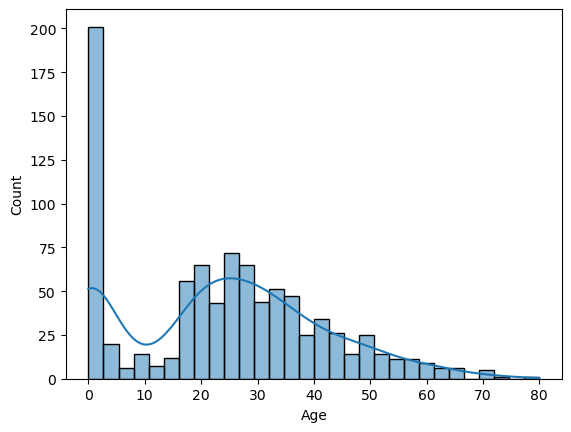

In [20]:

sns.histplot(df['Age'].dropna(), kde=True, bins=30)

<Axes: xlabel='Fare', ylabel='Count'>

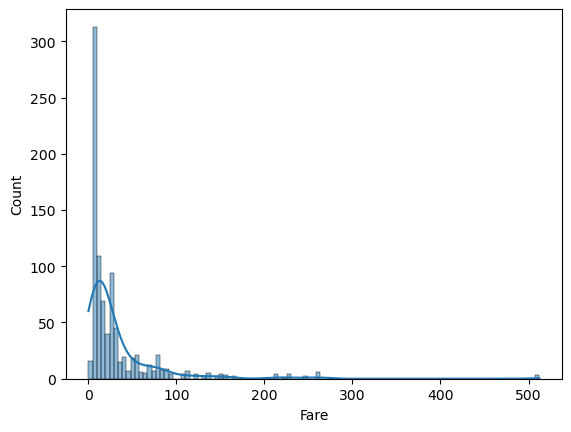

In [21]:

sns.histplot(df['Fare'], kde=True)


<Axes: xlabel='Sex', ylabel='count'>

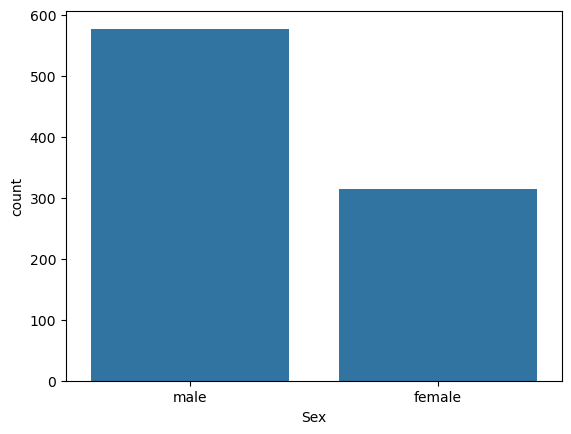

In [22]:
sns.countplot(x='Sex', data=df)

<Axes: xlabel='Pclass', ylabel='count'>

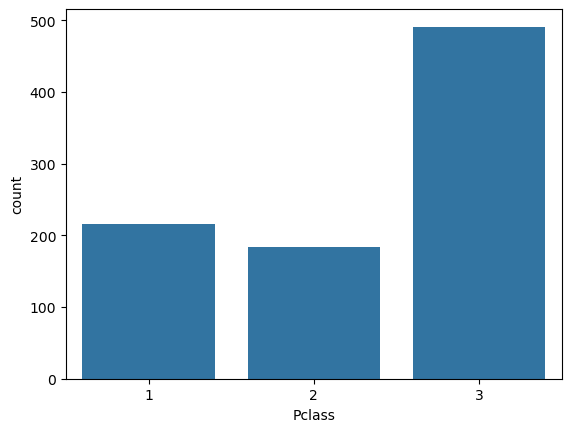

In [23]:
sns.countplot(x='Pclass', data=df)

**BIVARIATE ANALYSIS** -
In this section, we explore the relationship between each independent feature and the target variable Survived.

1.Sex vs Survived
-A countplot shows that females had a significantly higher survival rate than males.

2.Pclass vs Survived
-Passengers in 1st class had the highest survival rate.

-Those in 3rd class had the lowest, indicating socioeconomic status influenced survival.

3.Age Group vs Survived
-Young passengers (0–20)  and (20,40) had higher survival rates.

-Elderly had significantly lower survival chances.

4.Fare vs Survived
-Using a box plot, we observed that survivors generally paid higher fares, likely because they were in higher classes survived.



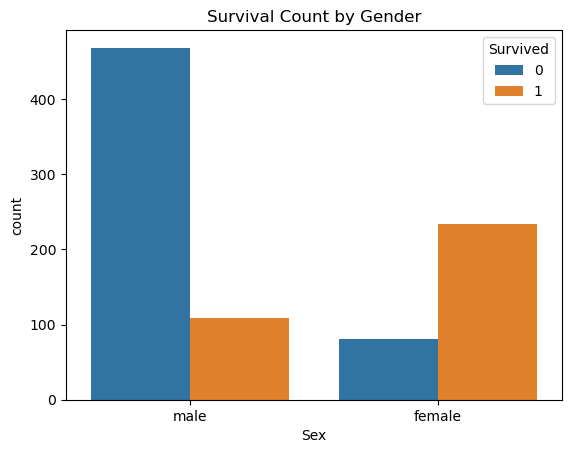

In [25]:
sns.countplot(x='Sex',hue='Survived',data=df)
plt.title('Survival Count by Gender')


plt.show()

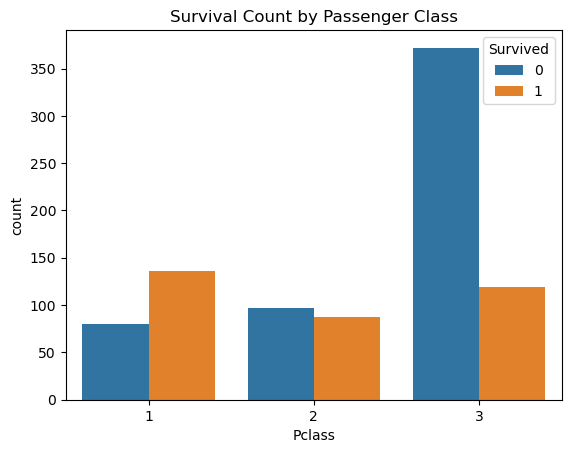

In [26]:
sns.countplot(x='Pclass',hue='Survived',data=df)
plt.title('Survival Count by Passenger Class')


plt.show()

In [27]:
df.groupby('Survived')['Age'].mean()


Survived
0    23.653005
1    24.034123
Name: Age, dtype: float64

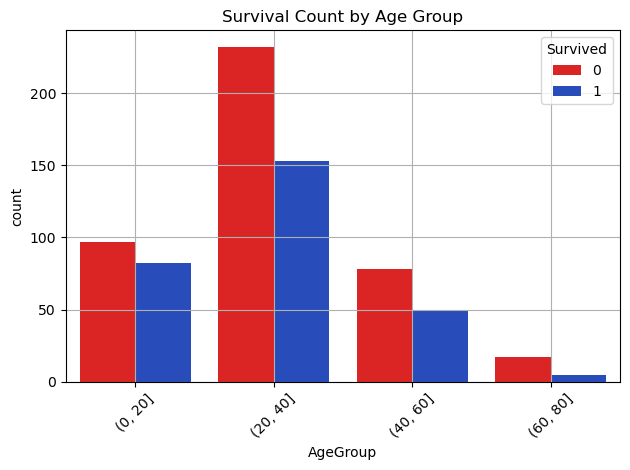

In [28]:
Choice_colours={0:'#FA0505', 1:'#0F41D4'}
df['AgeGroup'] = pd.cut(df['Age'], bins=np.arange(0, 85, 20))
sns.countplot(x='AgeGroup', hue='Survived', data=df, palette=Choice_colours)
plt.xticks(rotation=45)
plt.title("Survival Count by Age Group")
plt.tight_layout()
plt.grid('True')
plt.style.use('ggplot')
plt.show()


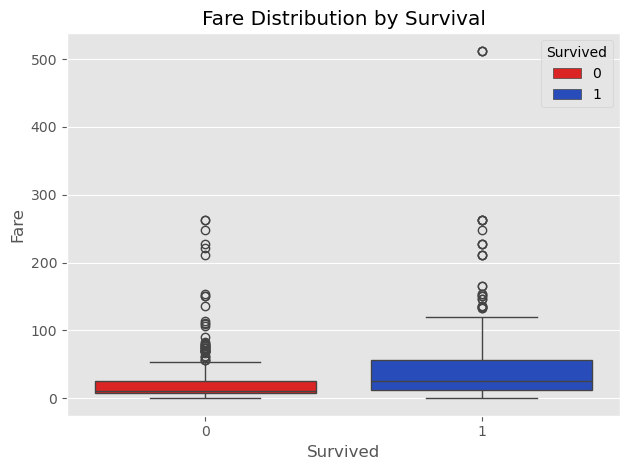

In [30]:
Choice_colours={0:'#FA0505', 1:'#0F41D4'}
sns.boxplot(x='Survived',y='Fare',hue='Survived',palette=Choice_colours,data=df)
plt.title('Fare Distribution by Survival')
plt.tight_layout()
plt.show()

**Multivariate Analysis** - In this section, we explore how multiple features interact with the survival outcome.

**Pclass & Sex vs Survival**
We analyze survival trends by combining gender and passenger class. It reveals that:
- Females in **1st and 2nd class** had much higher survival rates.
- Males in **3rd class** had the lowest survival rate.

**Fare vs Age by Survival**
-This scatterplot highlights that passengers who paid higher fares and were younger had better survival chances.


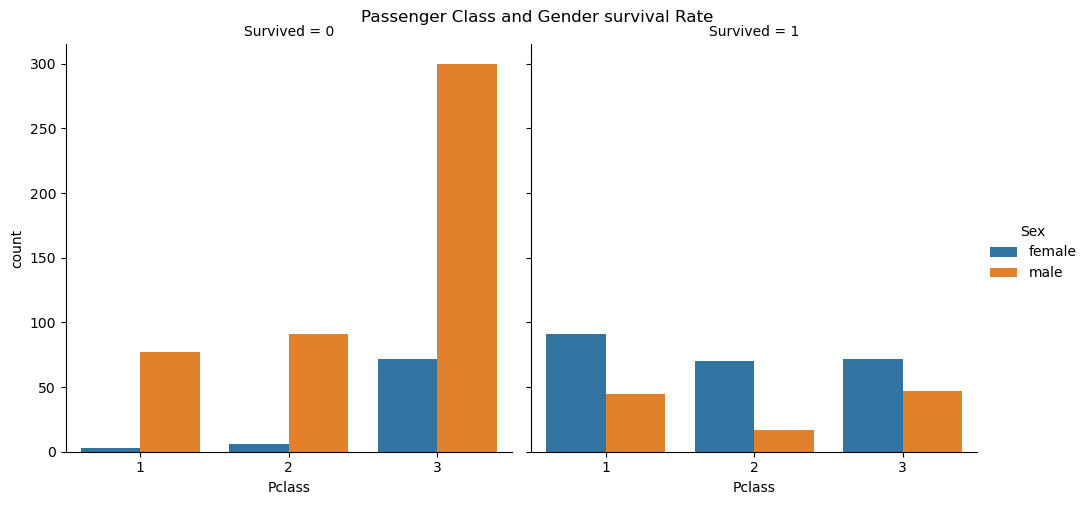

In [79]:
sns.catplot(x='Pclass',hue='Sex',col='Survived',data=df,kind='count')
plt.suptitle('Passenger Class and Gender survival Rate',y=1)
plt.style.use('default')
plt.show()


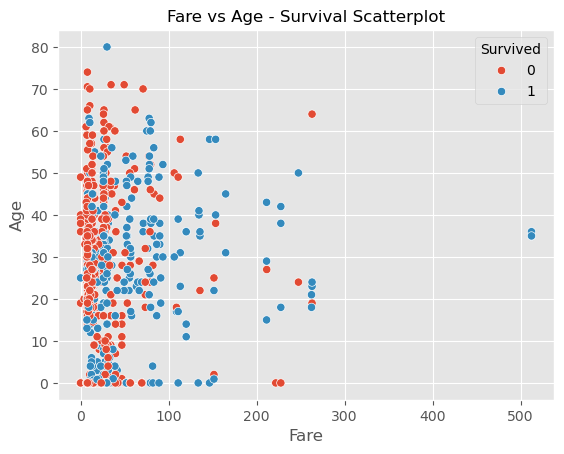

In [43]:
sns.scatterplot(x='Fare',y='Age',hue='Survived',data=df)
plt.style.use('default')
plt.grid('True')
plt.title('Fare vs Age - Survival Scatterplot')
plt.show()

Feature Engineering:  **Family Size**

We created a new feature `Family_Size` by summing the number of siblings/spouses (`SibSp`), parents/children (`Parch`), and adding 1 for the passenger themself:

In [48]:
df['family_size'] = df['SibSp']+ df['Parch'] +1

Univariate Analysis: **FamilySize**

We created a new feature called `FamilySize` by combining the number of siblings/spouses (`SibSp`) and parents/children (`Parch`) a passenger had onboard, and adding 1 to include the passenger themselves.

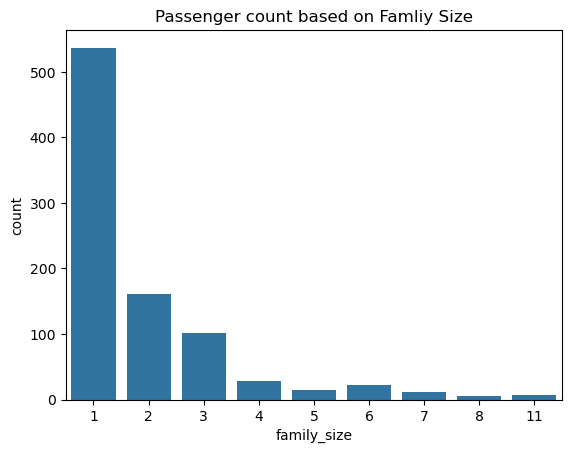

In [50]:
sns.countplot(x='family_size',data=df)
plt.title('Passenger count based on Famliy Size')
plt.show()

 Bivariate Analysis: **FamilySize vs Survived**

To explore how the number of family members on board affected survival chances, we visualized the relationship between `FamilySize` and the survival rate.

This helps us understand:
- Whether solo travelers were at a disadvantage
- If being with family improved survival chances

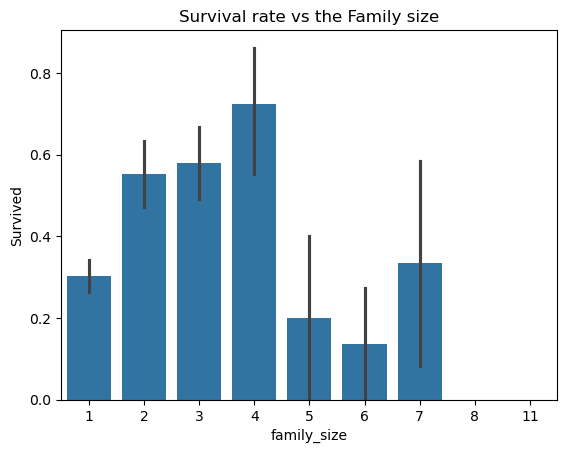

In [52]:
sns.barplot(x='family_size',y='Survived',data=df)
plt.title('Survival rate vs the Family size')
plt.show()

We engineered a new binary feature `Alone_tarveller`:
- 1 → Passenger is traveling alone (`FamilySize` == 1)
- 0 → Passenger is traveling with family

In [55]:
df['Alone_traveller'] = (df['family_size']==1).astype(int)

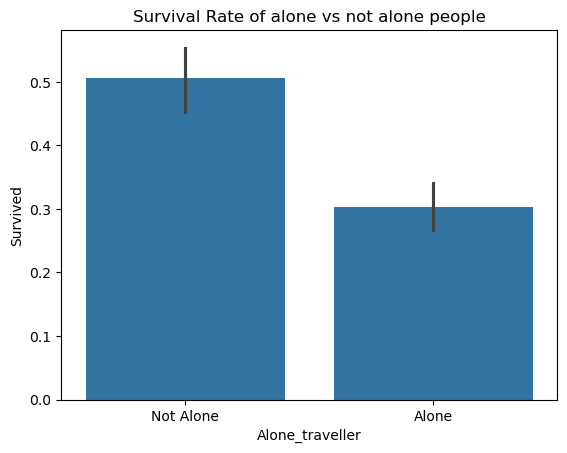

In [56]:
sns.barplot(x='Alone_traveller',y='Survived',data=df)
plt.title('Survival Rate of alone vs not alone people')
plt.xticks([0, 1], ["Not Alone", "Alone"])
plt.show()

Key Insights from EDA

- **Survival Rate:** Females had a significantly higher survival rate compared to males.
- **Passenger Class:** Passengers in Pclass 1 had higher survival rates than those in Pclass 3.
- **Age Group:** Children (0–20 years) and (20-40) had relatively higher chances of survival.
- **Fare:** Passengers who paid higher fares had better chances of survival (correlates with higher class).
- **Family Size:** Small family groups (2–4) had higher survival rates compared to individuals or large families.
- **Alone Travelers:** Solo travelers had lower survival rates.

These insights suggest that **class, gender, age**, and **social/family status** significantly influenced survival chances on the Titanic.